In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder , StandardScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import joblib

In [2]:
data=pd.read_csv("/kaggle/input/titanic-data-for-data-preprocessing/titanic_data.csv")

## Exploring data :

In [3]:
# Showing the first 5 records in the dataset
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Showing a brief info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          713 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     887 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  887 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.2+ KB


In [5]:
#Showing the null values in each column
data.isna().sum()

survived         0
pclass           0
sex              0
age            176
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           686
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
#We have Four columns with nulls values

In [7]:
# Get a describtion about data
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,713.000000,889.000000,889.000000,889.000000
mean,0.384702,2.307087,29.698696,0.523060,0.382452,32.259059
std,0.486799,0.836367,14.536691,1.103729,0.806761,49.735870
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualize data :

### Boxplots for discover outliers ### 

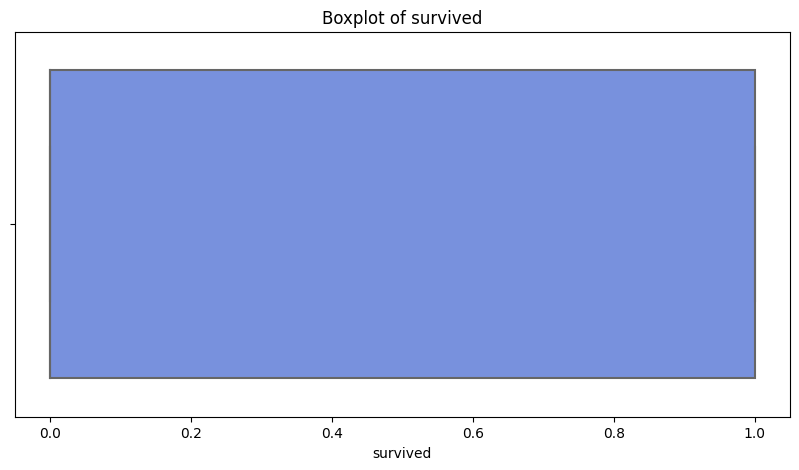

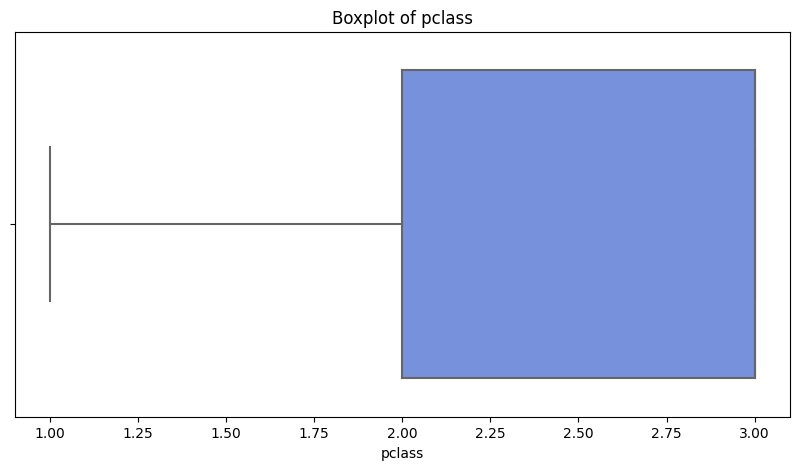

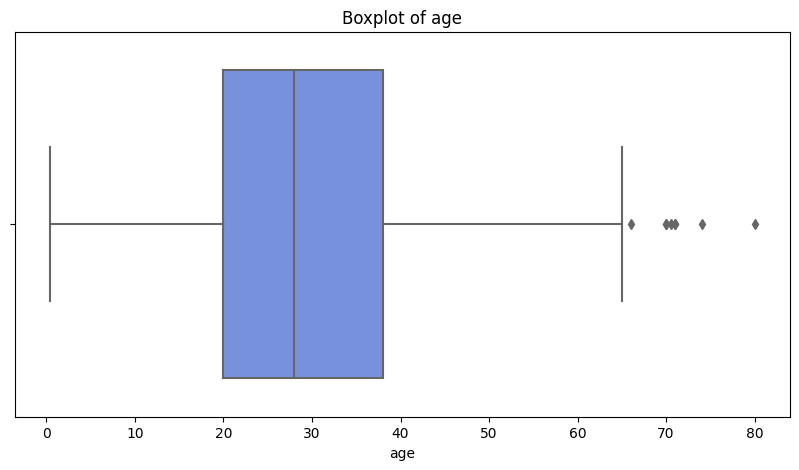

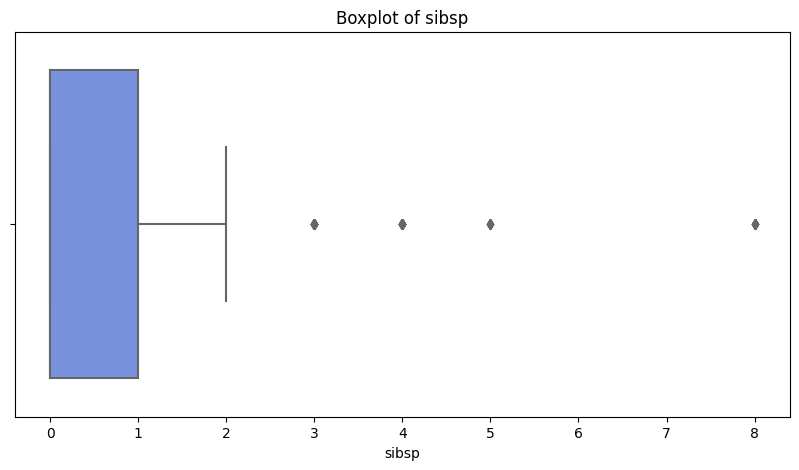

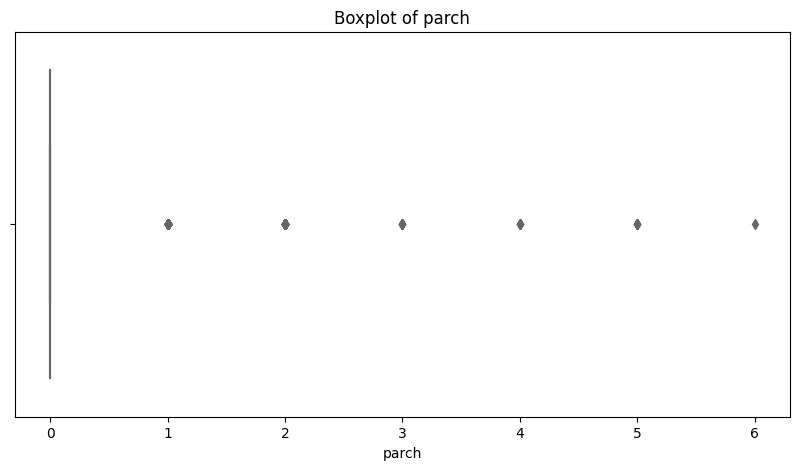

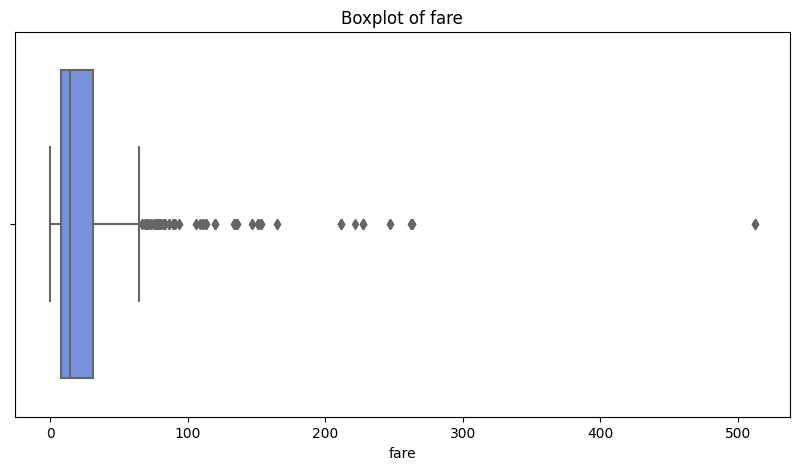

In [8]:
custom_palette = "coolwarm"
sns.set_palette(custom_palette)
for col in data.select_dtypes(include=['int', 'float']).columns:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(f'Boxplot of {col}')
    bp = sns.boxplot(data=data, x=col, ax=ax)
    plt.show()
    plt.close(fig)


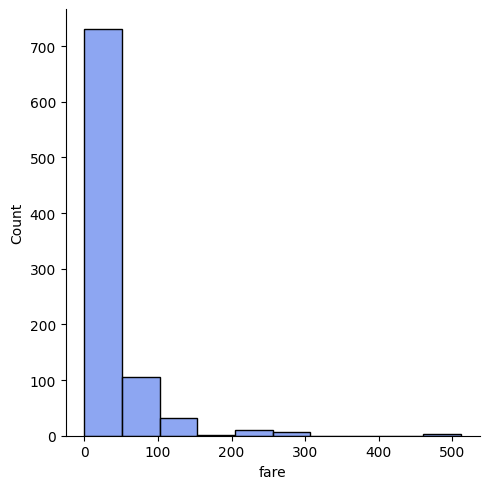

In [9]:
sns.set_palette("coolwarm")  
sns.displot(data=data, x="fare",bins=10)

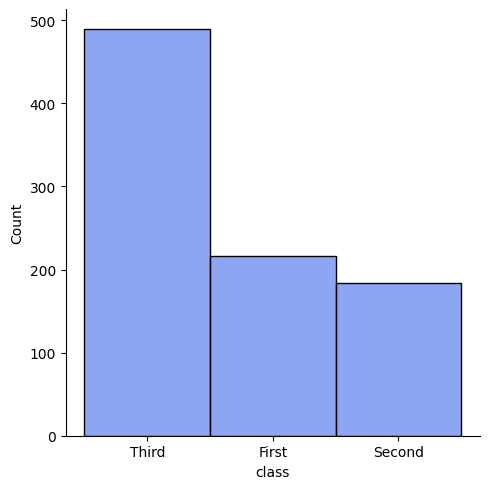

In [10]:
sns.set_palette("coolwarm")  
sns.displot(data=data, x="class")

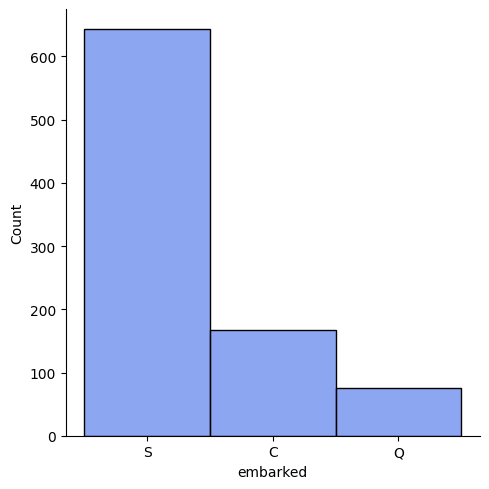

In [11]:
custom_palette = "coolwarm"  
sns.set_palette(custom_palette)
sns.displot(data=data, x="embarked")

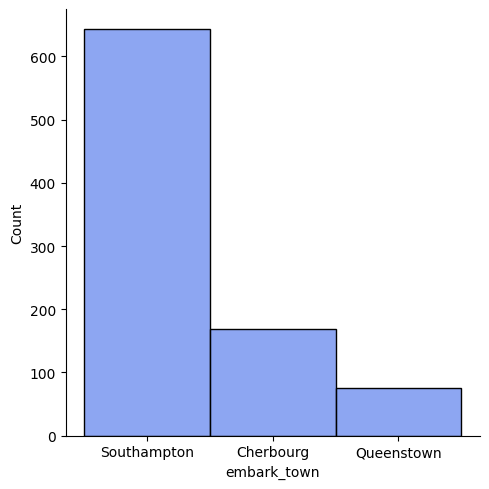

In [12]:
custom_palette = "coolwarm"  
sns.set_palette(custom_palette)
sns.displot(data=data, x="embark_town")

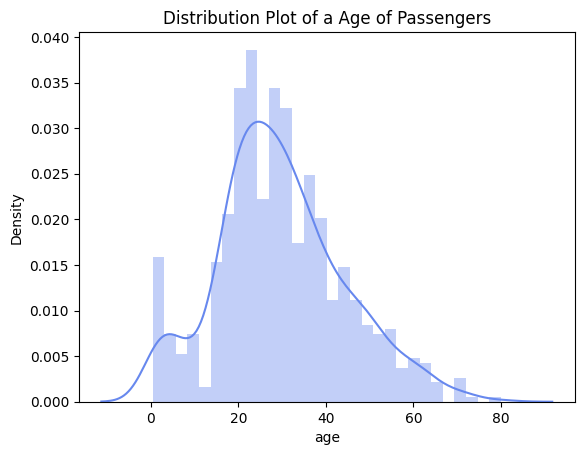

In [13]:
sns.set_palette("coolwarm")  
sns.distplot(data['age'], kde=True, bins=30)
plt.title('Distribution Plot of a Age of Passengers')
plt.show()

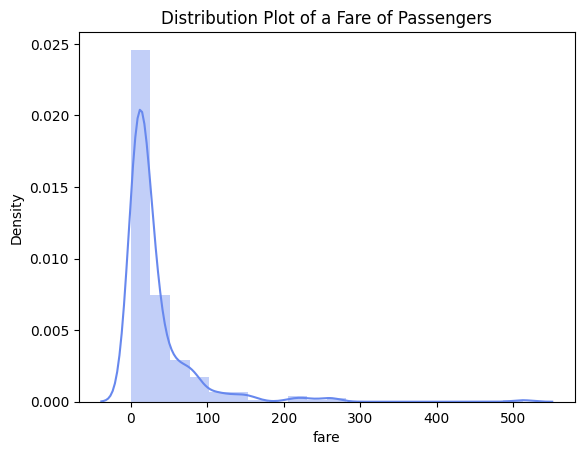

In [14]:
sns.set_palette("coolwarm") 
sns.distplot(data['fare'], kde=True, bins=20)
plt.title('Distribution Plot of a Fare of Passengers')
plt.show()

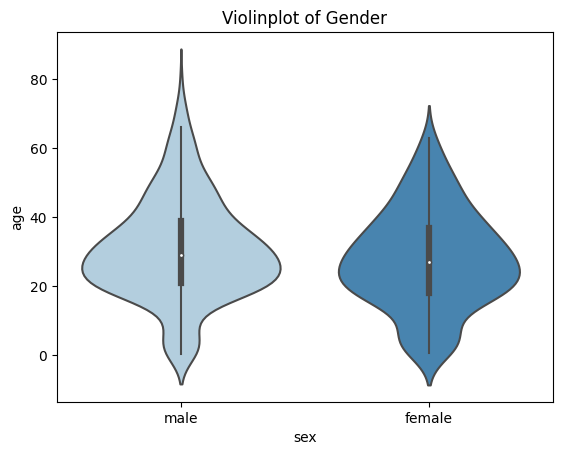

In [15]:
custom_palette = "Blues"
sns.violinplot(x='sex', y='age', data=data, palette=custom_palette)
plt.title('Violinplot of Gender')
plt.show()

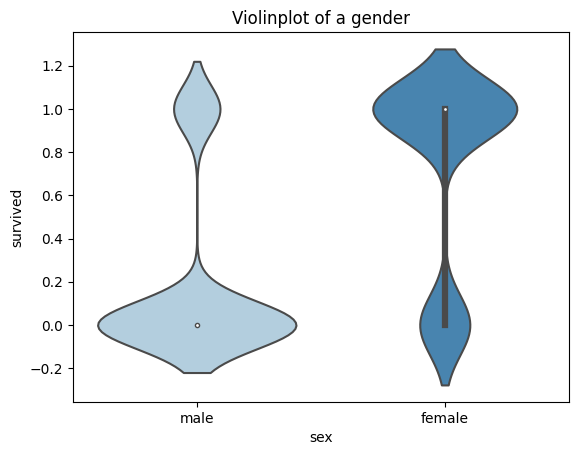

In [16]:
custom_palette = "Blues"
sns.violinplot(x='sex', y='survived', data=data,palette=custom_palette)
plt.title('Violinplot of a gender')
plt.show()

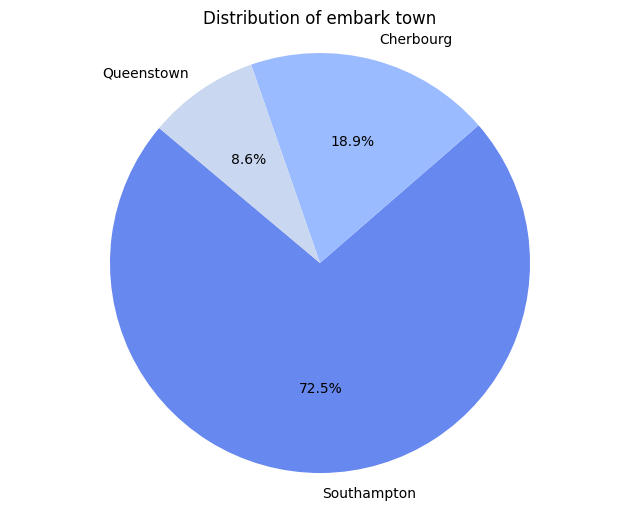

In [17]:
custom_palette = "coolwarm"
sns.set_palette(custom_palette)
plt.figure(figsize=(8, 6))
data['embark_town'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette(), startangle=140)
plt.title("Distribution of embark town")
plt.ylabel("")
plt.axis('equal')
plt.show()


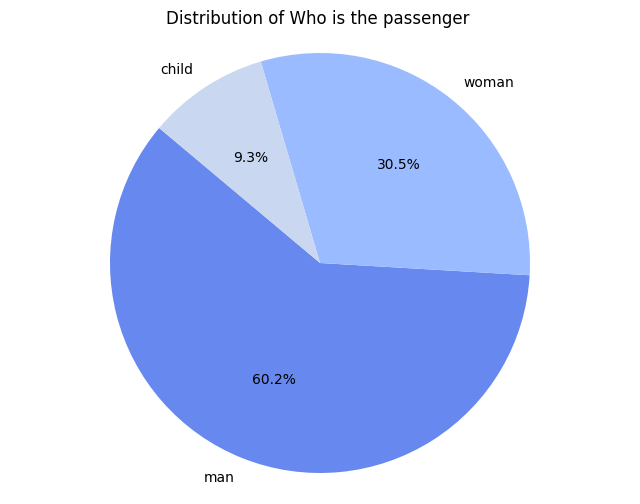

In [18]:
custom_palette = "coolwarm"
sns.set_palette(custom_palette)
plt.figure(figsize=(8, 6))
data['who'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette(), startangle=140)
plt.title("Distribution of Who is the passenger ")
plt.ylabel("")
plt.axis('equal')
plt.show()


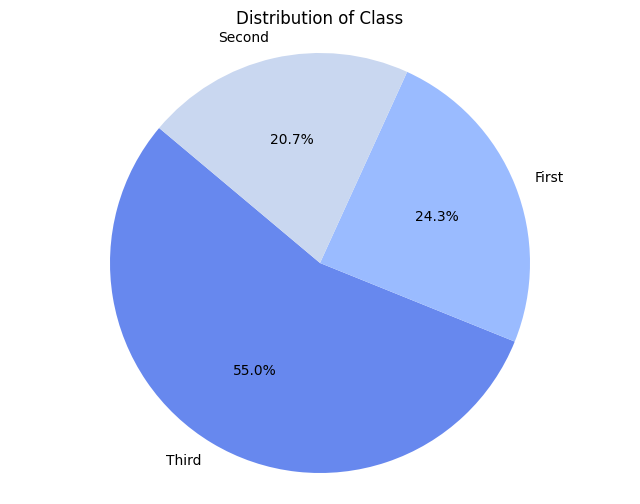

In [19]:
custom_palette = "coolwarm"
sns.set_palette(custom_palette)
plt.figure(figsize=(8, 6))
data['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette(), startangle=140)
plt.title("Distribution of Class")
plt.ylabel("")
plt.axis('equal')
plt.show()


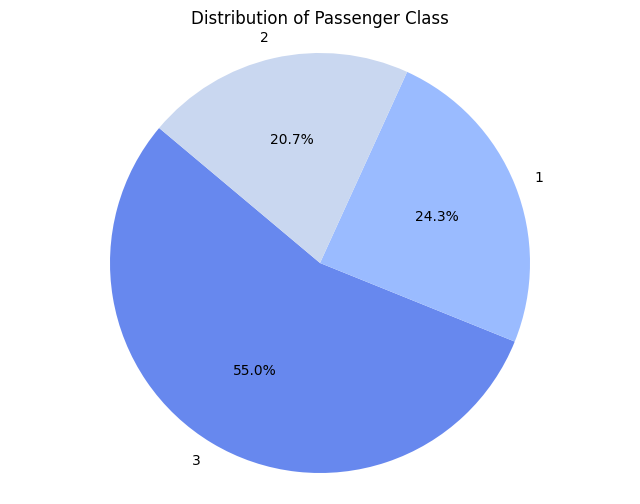

In [20]:
custom_palette = "coolwarm"
sns.set_palette(custom_palette)
plt.figure(figsize=(8, 6))
data['pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette(), startangle=140)
plt.title("Distribution of Passenger Class")
plt.ylabel("")
plt.axis('equal')
plt.show()


# Pre-Proccessing Operations : #

## Handling missing data :

#### drop this columns ; because : ####
##### deck :the most of its values are missing values and nan #####
##### adult_male : is column refers to another feature is in the dataset already #####
##### alive : is column refers to another feature is in the dataset already #####

In [21]:
data.drop(columns=["deck","adult_male","alive"],inplace=True)

In [22]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,S,Second,man,Southampton,True
885,1,1,female,19.0,0,0,30.0000,S,First,woman,Southampton,True
886,0,3,female,NaN,1,2,23.4500,S,Third,woman,Southampton,False
887,1,1,male,26.0,0,0,30.0000,C,First,man,Cherbourg,True


In [23]:
data["age"] = data["age"].fillna(np.mean(data["age"]))

In [24]:
data["age"].isna().sum()

0

In [25]:
data.dropna(subset=["embarked"], inplace=True)

In [26]:
data["embarked"].isna().sum()

0

In [27]:
data.dropna(subset=["embark_town"], inplace=True)
data["embark_town"].isna().sum()

0

In [28]:
data.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
embark_town    0
alone          0
dtype: int64

## Encoding categorical data :

In [29]:
for col in data.columns:
    if data[col].dtype == "object":
        print(data[col].value_counts())
        print("\n")


sex
male      575
female    312
Name: count, dtype: int64


embarked
S    643
C    168
Q     76
Name: count, dtype: int64


class
Third     489
First     214
Second    184
Name: count, dtype: int64


who
man      535
woman    269
child     83
Name: count, dtype: int64


embark_town
Southampton    643
Cherbourg      168
Queenstown      76
Name: count, dtype: int64




In [30]:
OHE_cols = ["sex","alone"]
LAB_cols = ["embark_town", "who", "embarked"]
ORD_cols = ["class"]

# Label Encoding
for col in LAB_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Ordinal Encoding
for col in ORD_cols:
    encoder = ce.OrdinalEncoder(cols=[col], handle_missing='return_nan')
    data[col] = encoder.fit_transform(data)[col]

# One-Hot Encoding
for col in OHE_cols:
    encoder = OneHotEncoder(sparse=False, drop='first')
    encoded_cols = encoder.fit_transform(data[[col]])
    encoded_df = pd.DataFrame(encoded_cols, columns=[f"{col}_{i}" for i in range(encoded_cols.shape[1])])
    data = pd.concat([data, encoded_df], axis=1)
    data.drop(columns=[col], inplace=True)



In [31]:
data.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,embark_town,sex_0,alone_0,alone_1
0,0.0,3.0,22.0,1.0,0.0,7.2500,2.0,1.0,1.0,2.0,1.0,0.0,0.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,2.0,2.0,0.0,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,2.0,1.0,2.0,2.0,0.0,1.0,0.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,2.0,2.0,2.0,2.0,0.0,0.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,2.0,1.0,1.0,2.0,1.0,1.0,0.0


In [32]:
data.columns=["survived","pclass","age","sibsp","parch","fare","embarked","class","who","embark_town",
              "male","alone","with someone"]

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 827
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      887 non-null    float64
 1   pclass        887 non-null    float64
 2   age           887 non-null    float64
 3   sibsp         887 non-null    float64
 4   parch         887 non-null    float64
 5   fare          887 non-null    float64
 6   embarked      887 non-null    float64
 7   class         887 non-null    float64
 8   who           887 non-null    float64
 9   embark_town   887 non-null    float64
 10  male          887 non-null    float64
 11  alone         889 non-null    float64
 12  with someone  889 non-null    float64
dtypes: float64(13)
memory usage: 97.2 KB


In [34]:
data.isna().sum()

survived        2
pclass          2
age             2
sibsp           2
parch           2
fare            2
embarked        2
class           2
who             2
embark_town     2
male            2
alone           0
with someone    0
dtype: int64

In [35]:
NA_Columns=["survived","pclass","age","sibsp","parch","fare","embarked","class","who","embark_town","male"]
for col in NA_Columns:
        data = data.dropna(subset=[col])

In [36]:
data.isna().sum()

survived        0
pclass          0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
who             0
embark_town     0
male            0
alone           0
with someone    0
dtype: int64

In [37]:
data=data.drop_duplicates()

## Scaling data :

In [38]:
Features=data.drop(columns="survived")
Goal=data["survived"]

In [39]:
Features

,pclass,age,sibsp,parch,fare,embarked,class,who,embark_town,male,alone,with someone
0,3.0,22.000000,1.0,0.0,7.2500,2.0,1.0,1.0,2.0,1.0,0.0,0.0
1,1.0,38.000000,1.0,0.0,71.2833,0.0,2.0,2.0,0.0,0.0,0.0,0.0
2,3.0,26.000000,0.0,0.0,7.9250,2.0,1.0,2.0,2.0,0.0,1.0,0.0
3,1.0,35.000000,1.0,0.0,53.1000,2.0,2.0,2.0,2.0,0.0,0.0,0.0
4,3.0,35.000000,0.0,0.0,8.0500,2.0,1.0,1.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
881,2.0,28.000000,0.0,0.0,10.5000,2.0,3.0,1.0,2.0,0.0,0.0,0.0
883,3.0,39.000000,0.0,5.0,29.1250,1.0,1.0,2.0,1.0,0.0,1.0,0.0
884,2.0,27.000000,0.0,0.0,13.0000,2.0,3.0,1.0,2.0,0.0,0.0,0.0
885,1.0,19.000000,0.0,0.0,30.0000,2.0,2.0,2.0,2.0,1.0,1.0,0.0


In [40]:
Features=StandardScaler().fit_transform(Features)

In [41]:
Features=pd.DataFrame(Features)

In [42]:
Features

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.861173,-0.575828,0.432460,-0.490542,-0.517779,0.582323,-0.851276,-0.351416,0.582323,0.756650,-1.205148,0.0
1,-1.504183,0.617088,0.432460,-0.490542,0.734913,-1.923339,0.399083,1.293849,-1.923339,-1.321615,-1.205148,0.0
2,0.861173,-0.277599,-0.500386,-0.490542,-0.504574,0.582323,-0.851276,1.293849,0.582323,-1.321615,0.829774,0.0
3,-1.504183,0.393416,0.432460,-0.490542,0.379191,0.582323,0.399083,1.293849,0.582323,-1.321615,-1.205148,0.0
4,0.861173,0.393416,-0.500386,-0.490542,-0.502129,0.582323,-0.851276,-0.351416,0.582323,0.756650,0.829774,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
819,-0.321505,-0.128485,-0.500386,-0.490542,-0.454199,0.582323,1.649442,-0.351416,0.582323,-1.321615,-1.205148,0.0
820,0.861173,0.691645,-0.500386,5.560461,-0.089836,-0.670508,-0.851276,1.293849,-0.670508,-1.321615,0.829774,0.0
821,-0.321505,-0.203042,-0.500386,-0.490542,-0.405291,0.582323,1.649442,-0.351416,0.582323,-1.321615,-1.205148,0.0
822,-1.504183,-0.799500,-0.500386,-0.490542,-0.072718,0.582323,0.399083,1.293849,0.582323,0.756650,0.829774,0.0


In [43]:
Goal

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
881    0.0
883    0.0
884    0.0
885    1.0
886    0.0
Name: survived, Length: 824, dtype: float64

In [44]:
Features.columns=["pclass","age","sibsp","parch","fare","embarked","class","who","embark_town",
              "male","alone","with someone"]

In [45]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pclass        824 non-null    float64
 1   age           824 non-null    float64
 2   sibsp         824 non-null    float64
 3   parch         824 non-null    float64
 4   fare          824 non-null    float64
 5   embarked      824 non-null    float64
 6   class         824 non-null    float64
 7   who           824 non-null    float64
 8   embark_town   824 non-null    float64
 9   male          824 non-null    float64
 10  alone         824 non-null    float64
 11  with someone  824 non-null    float64
dtypes: float64(12)
memory usage: 77.4 KB


# Splitting Train And Test Groups : #

In [46]:
Ftrain,Ftest,Gtrain,Gtest=train_test_split(Features,Goal,test_size=0.1,random_state=5)

# Applying GridSearch Model on Logistic Regression Classifier : #

In [47]:
LR_params={"penalty":['l1', 'l2','elasticnet', 'None'],
           "dual":[True,False],
           "tol":[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e-0,1e+1,1e+2,1e+3,1e+4,1e+5],
           "solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

LR = LogisticRegression()
GRS = GridSearchCV(LR, LR_params, cv=5)
GRS.fit(Ftrain, Gtrain)

# Print the best parameters and best score
print(GRS.best_params_)
print(GRS.best_score_)

{'dual': False, 'penalty': 'l1', 'solver': 'saga', 'tol': 10.0}
0.7422637402503175


In [48]:
LR=LogisticRegression(dual=False,penalty="l2",solver="saga",tol=10)
LR.fit(Ftrain,Gtrain)
LR_Pred=LR.predict(Ftest)
LR_Pred_Train=LR.predict(Ftrain)


In [49]:
print("Classification Report for the test group : \n")
print(classification_report(Gtest,LR_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Gtrain,LR_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.71      0.87      0.78        45
         1.0       0.79      0.58      0.67        38

    accuracy                           0.73        83
   macro avg       0.75      0.72      0.72        83
weighted avg       0.74      0.73      0.73        83
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81       450
         1.0       0.74      0.54      0.62       291

    accuracy                           0.74       741
   macro avg       0.74      0.71      0.72       741
weighted avg       0.74      0.74      0.74       741
 




In [50]:
test_accuracy = accuracy_score(Gtest, LR_Pred)
print(f"Accuracy Score for the test group: {test_accuracy:.4f}\n")
train_accuracy = accuracy_score(Gtrain, LR_Pred_Train)
print(f"Accuracy Score for the train group: {train_accuracy:.4f}\n")

Accuracy Score for the test group: 0.7349

Accuracy Score for the train group: 0.7449



[[39  6]
 [16 22]]


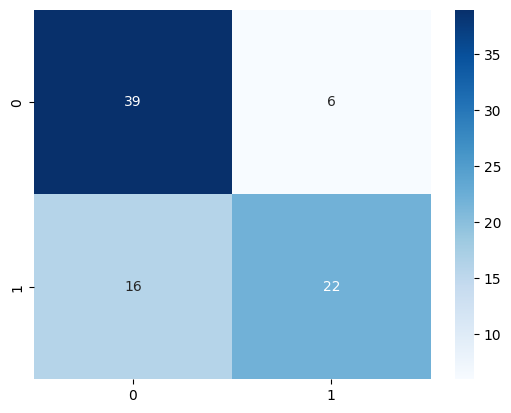

In [51]:
CM_LR=confusion_matrix(Gtest,LR_Pred)
print(CM_LR)
sns.heatmap(CM_LR,annot=True,cmap="Blues")
plt.show()

# Applying GridSearch Model on SVM Classifier : #

In [52]:
SVM_params = {
    'C': [0.1, 1, 10, 100],          
    'kernel': ['linear', 'rbf'],     
    'gamma': ['scale', 'auto'],     
    'degree': [2, 3, 4]               
}


SVM = svm.SVC()
GRS = GridSearchCV(SVM, SVM_params, cv=5)
GRS.fit(Ftrain, Gtrain)

# Print the best parameters and best score
print(GRS.best_params_)
print(GRS.best_score_)

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.7988935243968801


In [53]:
SVM=svm.SVC(C=1,degree=2,gamma="scale",kernel="rbf")
SVM.fit(Ftrain,Gtrain)
SVM_Pred=SVM.predict(Ftest)
SVM_Pred_Train=SVM.predict(Ftrain)

In [54]:
print("Classification Report for the test group : \n")
print(classification_report(Gtest,SVM_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Gtrain,SVM_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81        45
         1.0       0.79      0.71      0.75        38

    accuracy                           0.78        83
   macro avg       0.78      0.78      0.78        83
weighted avg       0.78      0.78      0.78        83
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       450
         1.0       0.84      0.72      0.78       291

    accuracy                           0.84       741
   macro avg       0.84      0.82      0.82       741
weighted avg       0.84      0.84      0.83       741
 




In [55]:
test_accuracy = accuracy_score(Gtest, SVM_Pred)
print(f"Accuracy Score for the test group: {test_accuracy:.4f}\n")
train_accuracy = accuracy_score(Gtrain, SVM_Pred_Train)
print(f"Accuracy Score for the train group: {train_accuracy:.4f}\n")

Accuracy Score for the test group: 0.7831

Accuracy Score for the train group: 0.8367



[[38  7]
 [11 27]]


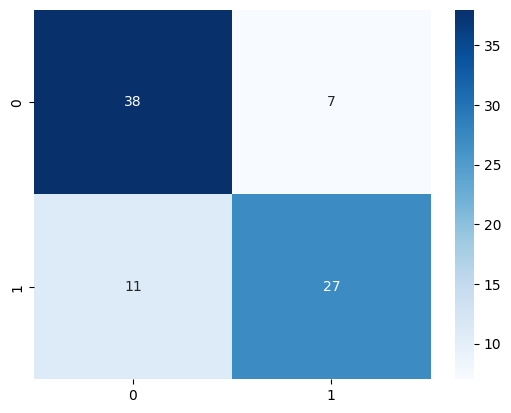

In [56]:
CM_SVM=confusion_matrix(Gtest,SVM_Pred)
print(CM_SVM)
sns.heatmap(CM_SVM,annot=True,cmap="Blues")
plt.show()

# Applying GridSearch Model on CatBoost Model : #

In [57]:
CB_params = {
    'learning_rate': [0.05, 0.1],
    'depth': [3, 5, 7],
    'iterations': [100, 200, 250],
    'bagging_temperature': [0.5, 1.0]
}

CB = CatBoostClassifier()
GRS = GridSearchCV(CB, CB_params, cv=5)
GRS.fit(Ftrain, Gtrain)

# Print the best parameters and best score
print(GRS.best_params_)
print(GRS.best_score_)

0:	learn: 0.6769001	total: 53.3ms	remaining: 5.27s
1:	learn: 0.6591686	total: 54ms	remaining: 2.65s
2:	learn: 0.6429666	total: 54.4ms	remaining: 1.76s
3:	learn: 0.6299283	total: 54.7ms	remaining: 1.31s
4:	learn: 0.6174118	total: 55ms	remaining: 1.04s
5:	learn: 0.6071344	total: 55.3ms	remaining: 866ms
6:	learn: 0.5992277	total: 55.5ms	remaining: 738ms
7:	learn: 0.5882593	total: 55.8ms	remaining: 642ms
8:	learn: 0.5790818	total: 56.1ms	remaining: 568ms
9:	learn: 0.5697057	total: 56.4ms	remaining: 508ms
10:	learn: 0.5636603	total: 56.7ms	remaining: 459ms
11:	learn: 0.5562093	total: 57ms	remaining: 418ms
12:	learn: 0.5481459	total: 57.3ms	remaining: 384ms
13:	learn: 0.5434282	total: 57.6ms	remaining: 354ms
14:	learn: 0.5361908	total: 57.9ms	remaining: 328ms
15:	learn: 0.5312834	total: 58.2ms	remaining: 305ms
16:	learn: 0.5249307	total: 58.5ms	remaining: 286ms
17:	learn: 0.5190367	total: 58.9ms	remaining: 268ms
18:	learn: 0.5150900	total: 59.2ms	remaining: 252ms
19:	learn: 0.5098826	total: 

In [58]:
CB=CatBoostClassifier(bagging_temperature=0.5,depth=5 ,iterations=300,learning_rate=0.05)
CB.fit(Ftrain,Gtrain)
CB_Pred=CB.predict(Ftest)
CB_Pred_Train=CB.predict(Ftrain)

0:	learn: 0.6717189	total: 1.08ms	remaining: 323ms
1:	learn: 0.6393218	total: 2.13ms	remaining: 317ms
2:	learn: 0.6142363	total: 3.25ms	remaining: 322ms
3:	learn: 0.5923745	total: 4.33ms	remaining: 321ms
4:	learn: 0.5784033	total: 5.4ms	remaining: 319ms
5:	learn: 0.5588049	total: 6.58ms	remaining: 322ms
6:	learn: 0.5428715	total: 7.61ms	remaining: 318ms
7:	learn: 0.5285758	total: 8.61ms	remaining: 314ms
8:	learn: 0.5176623	total: 9.57ms	remaining: 309ms
9:	learn: 0.5061378	total: 10.5ms	remaining: 306ms
10:	learn: 0.4954296	total: 11.5ms	remaining: 302ms
11:	learn: 0.4872715	total: 12.4ms	remaining: 297ms
12:	learn: 0.4816637	total: 13.3ms	remaining: 294ms
13:	learn: 0.4737350	total: 14.3ms	remaining: 292ms
14:	learn: 0.4669064	total: 15.3ms	remaining: 290ms
15:	learn: 0.4621631	total: 16.2ms	remaining: 287ms
16:	learn: 0.4551353	total: 17.2ms	remaining: 286ms
17:	learn: 0.4502368	total: 18.2ms	remaining: 285ms
18:	learn: 0.4471135	total: 19.2ms	remaining: 284ms
19:	learn: 0.4443741	to

In [59]:
print("Classification Report for the test group : \n")
print(classification_report(Gtest,CB_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Gtrain,CB_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81        45
         1.0       0.79      0.71      0.75        38

    accuracy                           0.78        83
   macro avg       0.78      0.78      0.78        83
weighted avg       0.78      0.78      0.78        83
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       450
         1.0       0.95      0.83      0.88       291

    accuracy                           0.91       741
   macro avg       0.92      0.90      0.91       741
weighted avg       0.92      0.91      0.91       741
 




In [60]:
test_accuracy = accuracy_score(Gtest, CB_Pred)
print(f"Accuracy Score for the test group: {test_accuracy:.4f}\n")
train_accuracy = accuracy_score(Gtrain, CB_Pred_Train)
print(f"Accuracy Score for the train group: {train_accuracy:.4f}\n")

Accuracy Score for the test group: 0.7831

Accuracy Score for the train group: 0.9150



[[38  7]
 [11 27]]


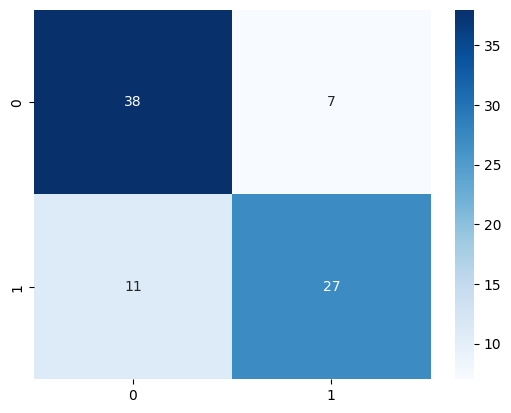

In [61]:
CM_CB=confusion_matrix(Gtest,CB_Pred)
print(CM_CB)
sns.heatmap(CM_CB,annot=True,cmap="Blues")
plt.show()

# Choosing The Final Model : # 

In [62]:
"""
The classification report for the test group shows precision of 0.78, recall of 0.84, and F1-score of 0.81 for class 0,
and precision of 0.79, recall of 0.71, and F1-score of 0.75 for class 1. The accuracy for the test group is 0.7831.
For the train group, precision for class 0 is 0.90, recall is 0.97, and F1-score is 0.93, while for class 1, precision 
is 0.95, recall is 0.83, and F1-score is 0.88. The accuracy for the train group is 0.9150. The confusion matrix indicates 38 
true negatives, 7 false positives, 11 false negatives, and 27 true positives.
The CatBoosting Model comes with the highest accuracy in training stage with 91 % , then SVM Model comes with 83 % and the 
LogisticRegression classifier comes the last with 73% . The CatBoosting and SVM are sharing The #1 place in test accuracy 78.3% ,
So the final review for me the CatBoosting Classifier is the best one for this task because it comes with :
1] Highest Trainig Accuracy 
2] Highest Test Accuracy 
3] The least False predictions (from the confusion matrix)
4] Avoiding Overfitting 
"""

'\nThe classification report for the test group shows precision of 0.78, recall of 0.84, and F1-score of 0.81 for class 0,\nand precision of 0.79, recall of 0.71, and F1-score of 0.75 for class 1. The accuracy for the test group is 0.7831.\nFor the train group, precision for class 0 is 0.90, recall is 0.97, and F1-score is 0.93, while for class 1, precision \nis 0.95, recall is 0.83, and F1-score is 0.88. The accuracy for the train group is 0.9150. The confusion matrix indicates 38 \ntrue negatives, 7 false positives, 11 false negatives, and 27 true positives.\nThe CatBoosting Model comes with the highest accuracy in training stage with 91 % , then SVM Model comes with 83 % and the \nLogisticRegression classifier comes the last with 73% . The CatBoosting and SVM are sharing The #1 place in test accuracy 78.3% ,\nSo the final review for me the CatBoosting Classifier is the best one for this task because it comes with :\n1] Highest Trainig Accuracy \n2] Highest Test Accuracy \n3] The lea

# Saving CatBoosting Model : #

In [63]:
joblib.dump(CB,"CatBoostingModel (Titanic Classification )- GDSC #3 Task.sav")

['CatBoostingModel (Titanic Classification )- GDSC #3 Task.sav']